In [1]:
## importing all libraries and dependencies
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
from random import sample
import math
from heapq import merge
from random import *
import secrets
from scipy.stats import spearmanr
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
summary_dir = '/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/'
summary_files = [f for f in listdir(summary_dir)]

In [14]:
tps = [2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
tps

[2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:

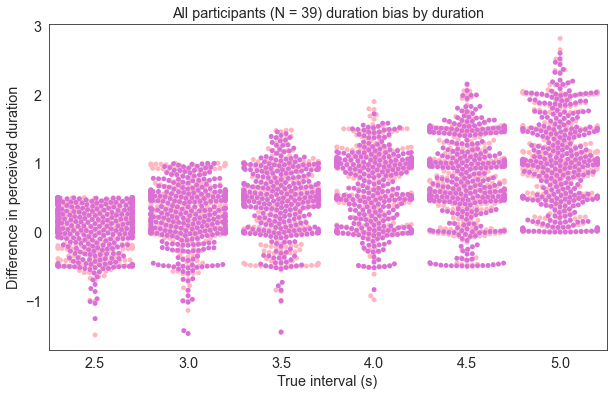

In [15]:
p_clr = '#FFB6C1'
v_clr = '#DA70D6'

fig, ax = plt.subplots(figsize=(10, 6))
df = pd.read_csv(summary_dir + 'emobdr_combined_csv.csv')
pt = (df["participant"].unique())
totalpts = len(pt)
tst = df.sort_values(by=['dur'])
percept = tst[tst["switch"] == "percept"]
p_tp = percept["dur"]
p_resp_diff = (percept["resp_diff"])
p_abs_resp = abs(percept["resp_diff"])
val = tst[tst["switch"] == "per_val"]
v_tp = val["dur"]
v_resp_diff = (val["resp_diff"])
v_abs_resp = abs(val["resp_diff"])
#ax.scatter(c_tp, c_resp_diff)
#ax.scatter(b_tp, b_resp_diff)

ax = plt.subplot(111)
w = 0.3
ofst = 0.15
ax = sns.swarmplot(p_tp, p_resp_diff, color= p_clr)
ax = sns.swarmplot(v_tp, v_resp_diff, color= v_clr)

plt.yticks(fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.xlabel('True interval (s)', fontsize = "x-large")
plt.ylabel('Difference in perceived duration', fontsize = "x-large")
plt.title("All participants (N = %s) duration bias by duration"%totalpts, fontsize = "x-large")
#ax.bar(c_tp, c_resp_diff, width=w, color= c_clr, align='center')
#ax.bar(b_tp +w, b_resp_diff, width=w, color= b_clr, align='center')
#ax.bar(x+w, k, width=w, color='r', align='center')
#ax.xaxis_date()
#ax.autoscale(tight=True)

plt.show()

C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:

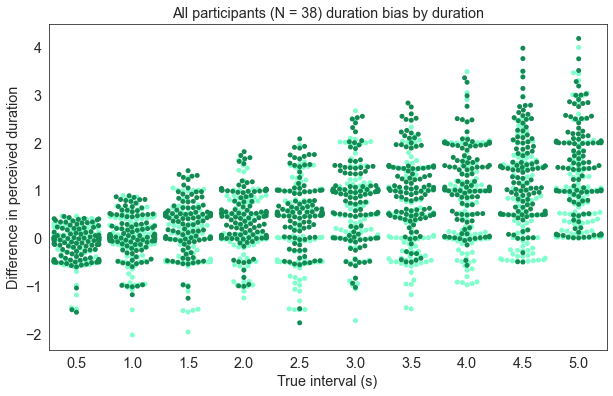

In [16]:
c_clr = '#7fffcc'
b_clr = '#138a52'

fig, ax = plt.subplots(figsize=(10, 6))
df = pd.read_csv(summary_dir + 'emoscene_combined_csv.csv')
pt = (df["participant"].unique())
totalpts = len(pt)
tst = df.sort_values(by=['dur'])
cont = tst[tst["condition"] == "Negcont"]
c_tp = cont["dur"]
c_resp_diff = (cont["resp_diff"])
c_abs_resp = abs(cont["resp_diff"])
bdry = tst[tst["condition"] == "Negbdr"]
b_tp = bdry["dur"]
b_resp_diff = (bdry["resp_diff"])
b_abs_resp = abs(bdry["resp_diff"])
#ax.scatter(c_tp, c_resp_diff)
#ax.scatter(b_tp, b_resp_diff)

ax = plt.subplot(111)
w = 0.3
ofst = 0.15
ax = sns.swarmplot(c_tp, c_resp_diff, color= c_clr)
ax = sns.swarmplot(b_tp, b_resp_diff, color= b_clr)

plt.yticks(fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.xlabel('True interval (s)', fontsize = "x-large")
plt.ylabel('Difference in perceived duration', fontsize = "x-large")
plt.title("All participants (N = %s) duration bias by duration"%totalpts, fontsize = "x-large")
#ax.bar(c_tp, c_resp_diff, width=w, color= c_clr, align='center')
#ax.bar(b_tp +w, b_resp_diff, width=w, color= b_clr, align='center')
#ax.bar(x+w, k, width=w, color='r', align='center')
#ax.xaxis_date()
#ax.autoscale(tight=True)

plt.show()

## for ANOVA interaction

In [17]:
anova_csv = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/emobdr_combined_csv.csv')
anova_wo_catch = anova_csv[anova_csv["condition"]!= "catch"]
anova_wo_catch.to_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/r_analysis/emobdr_dur_anova.csv')

C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

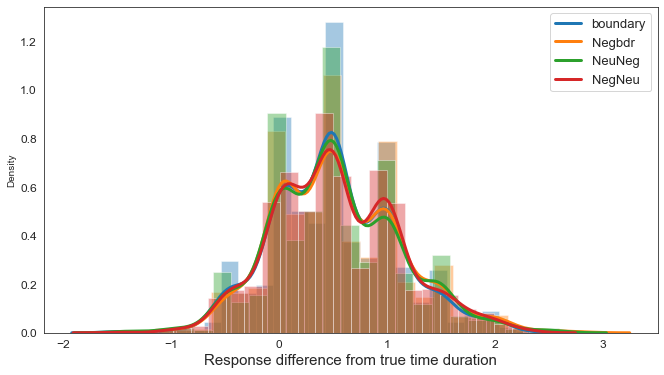

In [18]:
sns.set_style("white")
plt.figure(figsize=(11, 6))

for name in ['boundary', 'Negbdr', 'NeuNeg', 'NegNeu']:
    sns.distplot(anova_wo_catch[anova_wo_catch.color==name].resp_diff, kde_kws=dict(linewidth=3))
    
plt.legend(['boundary', 'Negbdr', 'NeuNeg', 'NegNeu'], fontsize=13)
plt.xlabel('Response difference from true time duration', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [2]:
tst_csv = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/r_analysis/emobdr_dur_anova.csv')
tst_sort = tst_csv.sort_values(["dur"])
tst_sort

C:\Users\ayesh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (105) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Unnamed: 0.1,codeJS_started,codeJS_stopped,participant,session,date,expName,psychopyVersion,OS,...,key_resp_11_duration,the_end_started,the_end_stopped,key_resp_16_keys,key_resp_16_rt,key_resp_16_duration,rho,p_value,zscr,resp_diff
1218,1339,83,NaN,NaN,A1XAOEDK0Y2KBT,1,2024-02-14_13h17.51.148,bdr_emoscene_task,2023.2.2,Win32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.759748,2.588970e-25,0.995620,-0.371094
675,744,128,NaN,NaN,A1D4I1QYL9713I,1,2024-02-16_13h08.09.910,bdr_emoscene_task,2023.2.2,Win32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.763244,1.159957e-25,1.003941,-0.491667
1684,1857,89,NaN,NaN,A2FCGEU5RTEWG8,1,2024-02-16_24h10.06.069,bdr_emoscene_task,2023.2.2,Win32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.890556,6.230868e-45,1.424607,0.313883
3849,4241,41,NaN,NaN,A5TI9UQEPLNWI,1,2024-02-17_08h48.50.581,bdr_emoscene_task,2023.2.2,Win32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.805801,1.873204e-30,1.114939,0.140625
3452,3803,115,NaN,NaN,A3QC57KUVJP5EW,1,2024-02-16_04h19.42.726,bdr_emoscene_task,2023.2.2,Win32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.807561,1.120027e-30,1.119978,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,2052,28,NaN,NaN,A2PEXE95UD6Y5S,1,2024-02-19_15h30.39.484,bdr_emoscene_task,2023.2.2,Win32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.811113,3.902410e-31,1.130275,1.826667
1861,2050,26,NaN,NaN,A2PEXE95UD6Y5S,1,2024-02-19_15h30.39.484,bdr_emoscene_task,2023.2.2,Win32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.811113,3.902410e-31,1.130275,1.986667
1860,2049,25,NaN,NaN,A2PEXE95UD6Y5S,1,2024-02-19_15h30.39.484,bdr_emoscene_task,2023.2.2,Win32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.811113,3.902410e-31,1.130275,2.323333
3767,4148,76,NaN,NaN,A4W9APAHFWVLO,1,2024-02-16_06h36.51.040,bdr_emoscene_task,2023.2.2,Win32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.926676,2.172756e-55,1.634329,0.636111


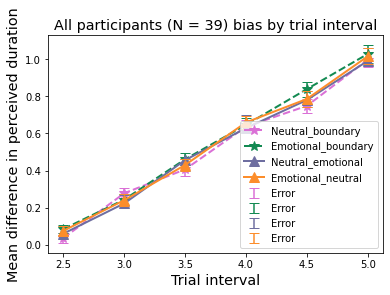

In [3]:
tpts = len(tst_sort.participant.unique())
intrvls = tst_sort.dur.unique()
Nbdry = tst_sort.loc[tst_sort['condition'] == 'boundary']
Ebdry = tst_sort.loc[tst_sort['condition'] == 'Negbdr']
NEbdry = tst_sort.loc[tst_sort['condition'] == 'NeuNeg']
ENbdry = tst_sort.loc[tst_sort['condition'] == 'NegNeu']

neu_bdry = Nbdry.groupby('dur')['resp_diff'].mean()
emo_bdry = Ebdry.groupby('dur')['resp_diff'].mean()
neu_emo = NEbdry.groupby('dur')['resp_diff'].mean()
emo_neu = ENbdry.groupby('dur')['resp_diff'].mean()

nb_sem = Nbdry.groupby('dur')['resp_diff'].sem()
eb_sem = Ebdry.groupby('dur')['resp_diff'].sem()
ne_sem = NEbdry.groupby('dur')['resp_diff'].sem()
en_sem = ENbdry.groupby('dur')['resp_diff'].sem()


plt.plot(intrvls, neu_bdry, color='#DA70D6', marker='*', linestyle='dashed',
     linewidth=2, markersize=10, label = 'Neutral_boundary')
plt.errorbar(intrvls, neu_bdry, yerr=nb_sem, color = '#DA70D6', fmt='none', capsize=5, label='Error')  # Add error bars
plt.plot(intrvls, emo_bdry, color= '#138a52', marker='*', linestyle='dashed',
     linewidth=2, markersize=10, label = 'Emotional_boundary')
plt.errorbar(intrvls, emo_bdry, yerr=eb_sem, color = '#138a52', fmt='none', capsize=5, label='Error')  # Add error bars

plt.plot(intrvls, neu_emo, color='#6e6ea0', marker='^', linestyle='solid',
     linewidth=2, markersize=10, label = 'Neutral_emotional')
plt.errorbar(intrvls, emo_neu, yerr=ne_sem, color = '#6e6ea0', fmt='none', capsize=5, label='Error')  # Add error bars

plt.plot(intrvls, emo_neu, color='#fc8d2b', marker='^', linestyle='solid',
     linewidth=2, markersize=10, label = 'Emotional_neutral')
plt.errorbar(intrvls, emo_neu, yerr=en_sem, color = '#fc8d2b', fmt='none', capsize=5, label='Error')  # Add error bars

plt.xlabel("Trial interval", fontsize = "x-large")
plt.ylabel("Mean difference in perceived duration", fontsize = "x-large")
plt.title("All participants (N = %s) bias by trial interval"%tpts, fontsize = "x-large")
plt.legend()
plt.savefig('emobdr_dur.pdf')

## individual diffs

In [21]:
neu_emo2 = NEbdry.groupby(['participant','dur'])['resp_diff'].mean()
emo_neu2 = ENbdry.groupby(['participant','dur'])['resp_diff'].mean()
neu_bdry2 = Nbdry.groupby(['participant','dur'])['resp_diff'].mean()
emo_bdry2 = Ebdry.groupby(['participant','dur'])['resp_diff'].mean()

In [22]:
pt_dur_cond = pd.DataFrame({"neu_bdry": neu_bdry2,
                           "emo_bdry": emo_bdry2,
                            "neu_emo": neu_emo2,
                           "emo_neu": emo_neu2,
                           "percept_diff": (neu_bdry2-emo_bdry2),
                           "pv_diff": (neu_emo2-emo_neu2)})
pt_dur_cond.to_csv("/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/r_analysis/pt_dur_bdrcond2.csv")

In [23]:
emo_bdry2

participant    dur
3nan           2.5    0.027107
               3.0   -0.089903
               3.5   -0.020971
               4.0    0.404932
               4.5    0.406291
                        ...   
ATHS9GUME1XCA  3.0    0.402344
               3.5    0.800000
               4.0    1.142187
               4.5    1.416406
               5.0    2.003125
Name: resp_diff, Length: 228, dtype: float64

In [14]:
compressor = []
non = []
pt_ls = []

Ncont_mean = []
Econt_mean = []
Nbdry_mean = []
Ebdry_mean = []

for a in indiv_files:
    pt_ls.append(a[:-4])
    pt_csv = pd.read_csv(indiv_folder + a)
    pt_df = pt_csv[pt_csv["catch_trial"] == "No"]

    Cneupt = pt_df[pt_df["condition"] == "continious"]
    Cemopt = pt_df[pt_df["condition"] == "Negcont"]
    Bneupt = pt_df[pt_df["condition"] == "boundary"]
    Bemopt = pt_df[pt_df["condition"] == "Negbdr"]
    
    CN_trls = []
    CE_trls = []
    BN_trls = []
    BE_trls = []

    for index, row in Cneupt.iterrows():
        if str(Cneupt.slider_response[index]) != 'nan':
            CN_trls.append(abs(Cneupt.dur[index] - Cneupt.slider_response[index]))
    for index, row in Cemopt.iterrows():
        if str(Cemopt.slider_response[index]) != 'nan':
            CE_trls.append(abs(Cemopt.dur[index] - Cemopt.slider_response[index]))
    for index, row in Bneupt.iterrows():
        if str(Bneupt.slider_response[index]) != 'nan':
            BN_trls.append(abs(Bneupt.dur[index] - Bneupt.slider_response[index]))
    for index, row in Bemopt.iterrows():
        if str(Bemopt.slider_response[index]) != 'nan':
            BE_trls.append(abs(Bemopt.dur[index] - Bemopt.slider_response[index]))
    
    Ncont_mean.append(np.mean(CN_trls))
    Econt_mean.append(np.mean(CE_trls))
    Nbdry_mean.append(np.mean(BN_trls))
    Ebdry_mean.append(np.mean(BE_trls))

In [24]:
len(intrvls)

10